# 可视化网格 代码事例

In [1]:
import numpy as np
import torch
import msgpack
import matplotlib.pyplot as plt
from utils import *
import json

In [3]:
file_name = "./data/lego.msgpack"


with open(file_name, 'rb') as f:
    unpacker = msgpack.Unpacker(f, raw = False, max_buffer_size = 0)
    config = next(unpacker)
grid_raw = torch.tensor(np.clip(
    np.frombuffer(config["snapshot"]["density_grid_binary"],dtype=np.float16).astype(np.float32),
    0, 1))
grid = torch.zeros([128 * 128 * 128], dtype = torch.float32)
x_id, y_id, z_id = inv_morton_naive(torch.arange(0, 128**3, 1))
grid[x_id * 128 * 128 + y_id * 128 + z_id] = grid_raw

grid = grid.reshape([128, 128, 128])

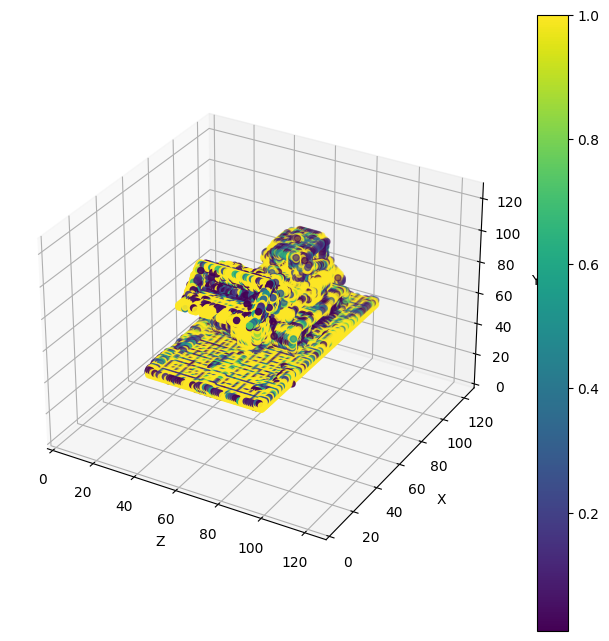

Point Cloud Size = 68330


In [4]:
x, y, z = torch.where(grid > 0.01)
point_cloud = torch.stack([x, y, z], dim = 1).float()


# Visualize the grid
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1, projection = "3d")
ax.set_xlim(0,127)
ax.set_xlabel("Z")
ax.set_ylim(0,127)
ax.set_ylabel("X")
ax.set_zlim(0,127)
ax.set_zlabel("Y")
densities = ax.scatter(z, x, y, c = grid[x, y, z])
fig.colorbar(densities)
plt.show()

point_cloud_size = torch.count_nonzero(grid > 0.01)
print(f"Point Cloud Size = {point_cloud_size}")